# Purpose of the Code

The goal of this notebook is to extract EMG signals recorded using Myo armband system, process the raw data, extract meaningful features, and store the resulting information in a structured DataFrame format.

## Libraries

In [1]:
#pip install libemg
#pip install --upgrade paramiko cryptography
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('../../lib')
from myo_utils import myo_dataframe_edit
from emg_utils import plot_emg_signal, emg_filters, extract_emg_windows, extract_emg_features

# Loading Data Files

In [2]:
folder_path = '../../data/acquisitions/myo/05_26/all'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
dataframes = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=None)
    df = df.iloc[:, 1:]
    dataframes.append(df)
dataframes

[      1  2  3  4  5  6   7   8
 0     1 -2 -1  0  0 -3   0   0
 1    -1  0  1 -1  0  0  -2  -1
 2    -2 -1  0 -1 -2 -1   0   1
 3     2 -1  0  0 -1 -1   1   0
 4    -1 -1 -1  0 -1 -2   0  -1
 ...  .. .. .. .. .. ..  ..  ..
 4748  4  1  0 -1  3  4  -9 -92
 4749 -1  0 -2 -2  0 -2  12  32
 4750  0  0  1  0  0  3   4  16
 4751 -3 -2 -1  0  0 -1  -3 -32
 4752  1 -2 -1 -4 -2 -6  -5 -37
 
 [4753 rows x 8 columns],
        1  2   3  4  5  6  7   8
 0     -1 -2  -1 -2 -1 -1 -2  -1
 1     -1 -2   0 -1  0  1 -3   0
 2     -1 -1  -1  0 -1  0 -1   0
 3     -1 -1  -1 -1 -2 -1 -2  -1
 4     -2 -1  -2  0 -1 -1 -1  -1
 ...   .. ..  .. .. .. .. ..  ..
 5041   0 -2  -1  0 -4  0  3  31
 5042 -13 -1 -10 -1 -2  0 -4 -35
 5043  12  7  37  7  3  1 -3  33
 5044  -2  0   1  0  2 -1 -7 -20
 5045   4 -2  -3 -2 -2 -4  0  19
 
 [5046 rows x 8 columns]]

In [3]:
dataframes = [myo_dataframe_edit(df) for df in dataframes]

In [4]:
"""valid_channels = ["1", "2", "3", "4", "5", "6", "7", "8"]
while True:
    channel_number = input(f"Enter the number of the channel (e.g., {', '.join(valid_channels)}): ")
    if channel_number in valid_channels:
        break
    else:
        print("Invalid channel number. Please enter one of the listed options.")"""

'valid_channels = ["1", "2", "3", "4", "5", "6", "7", "8"]\nwhile True:\n    channel_number = input(f"Enter the number of the channel (e.g., {\', \'.join(valid_channels)}): ")\n    if channel_number in valid_channels:\n        break\n    else:\n        print("Invalid channel number. Please enter one of the listed options.")'

In [5]:
"""channel_emg_raw, emg_time = myo_extract_muscle_emg (dataframes, channel_number)"""
#plot_emg_signal(muscle_emg_raw[0], emg_time[0], title=f"{muscle_name} EMG Raw Signal #1")

'channel_emg_raw, emg_time = myo_extract_muscle_emg (dataframes, channel_number)'

In [6]:
fs = 200;
for df in dataframes:
    num_samples = len(df)
    df['time'] = np.arange(num_samples) / fs

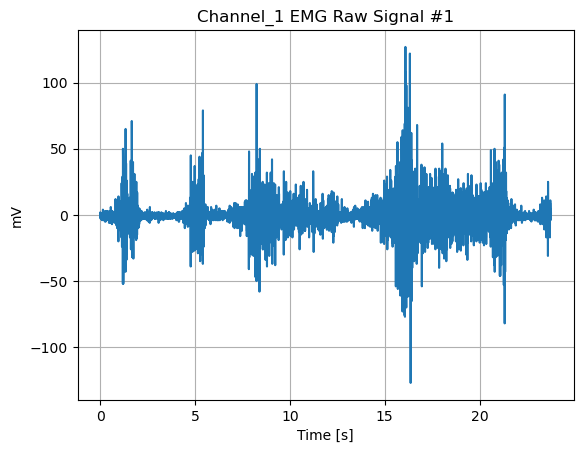

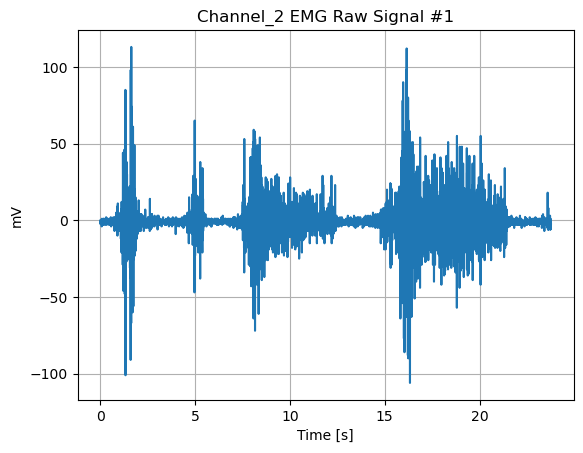

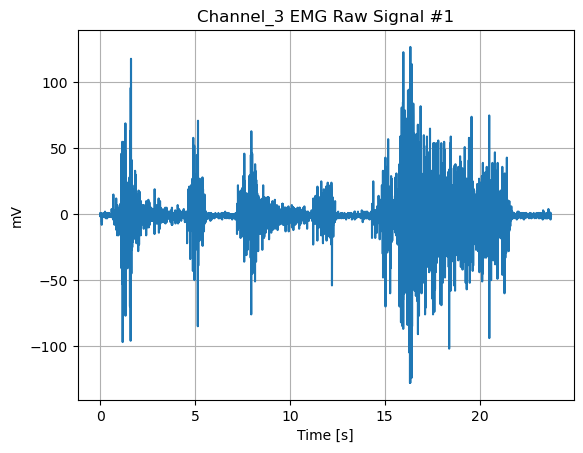

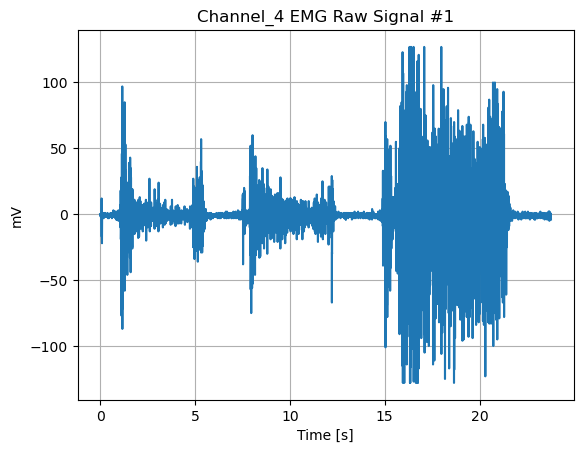

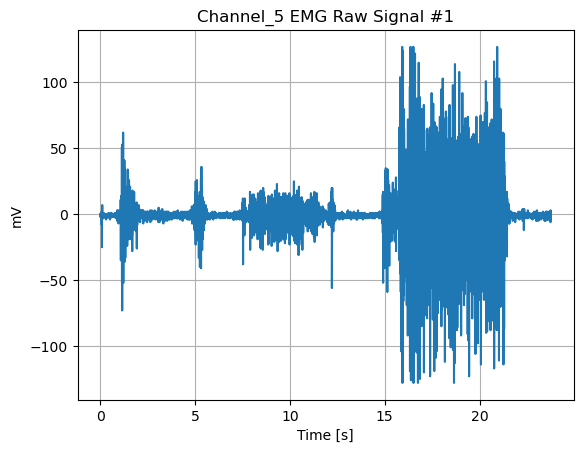

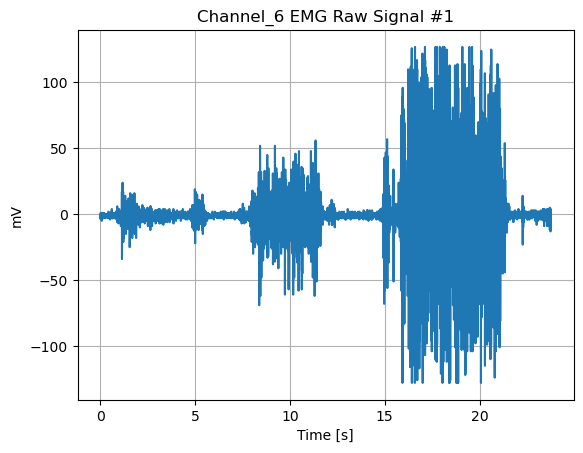

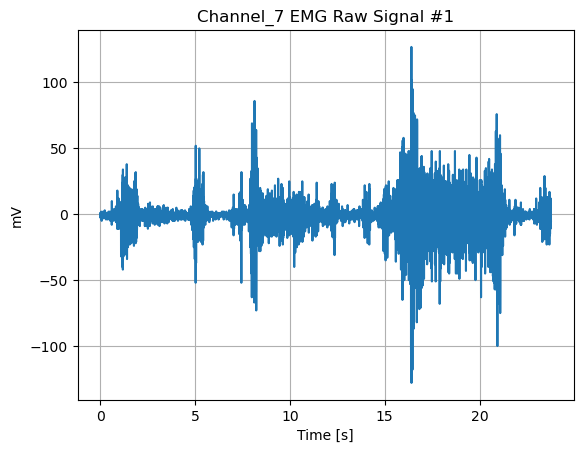

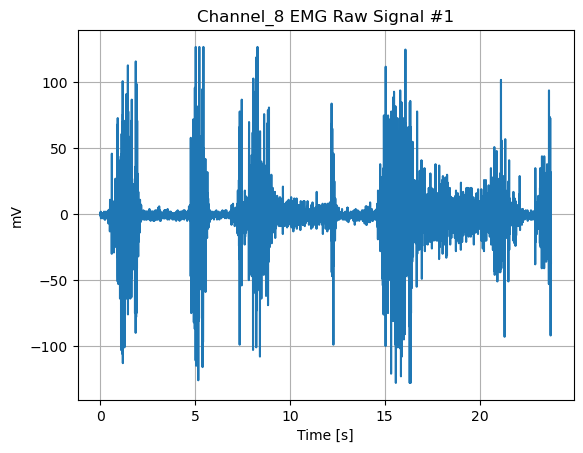

In [7]:
for i in range(1, 9):  # Canali da 1 a 8
    channel_name = f'Channel_{i}'
    plot_emg_signal(
        dataframes[0][channel_name],
        dataframes[0]['time'],
        title=f"{channel_name} EMG Raw Signal #1"
    )

# EMG Signal Analysis

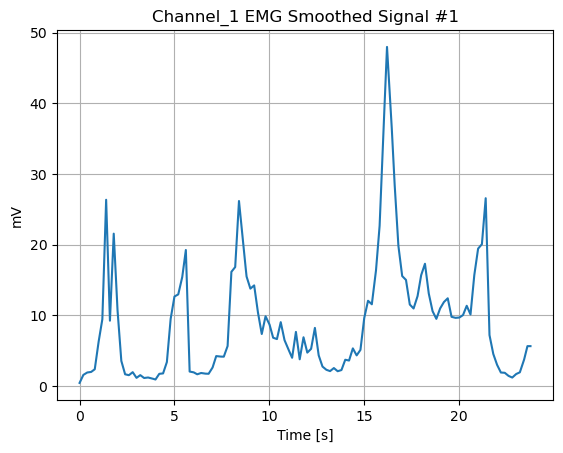

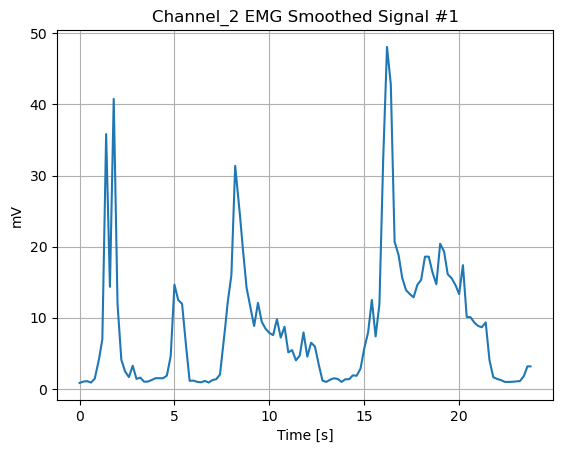

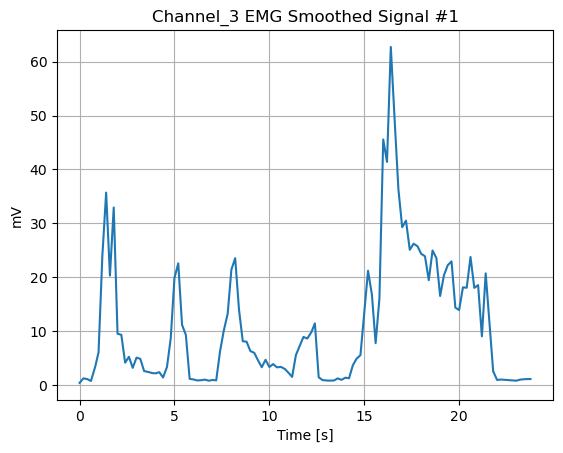

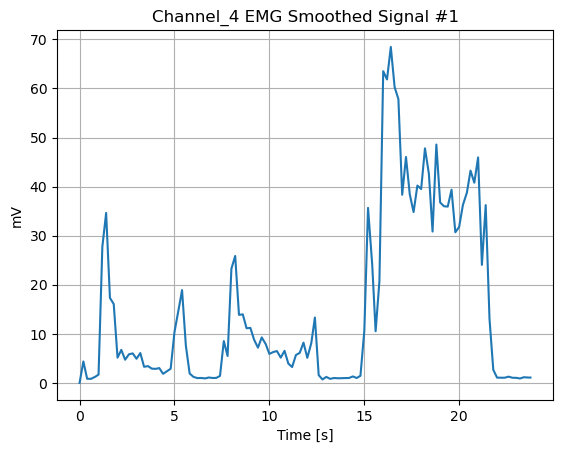

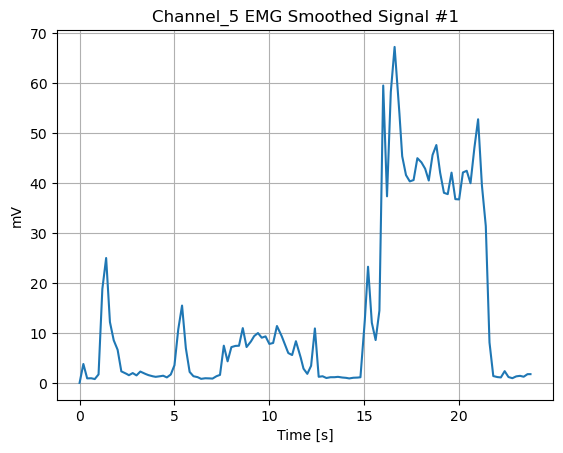

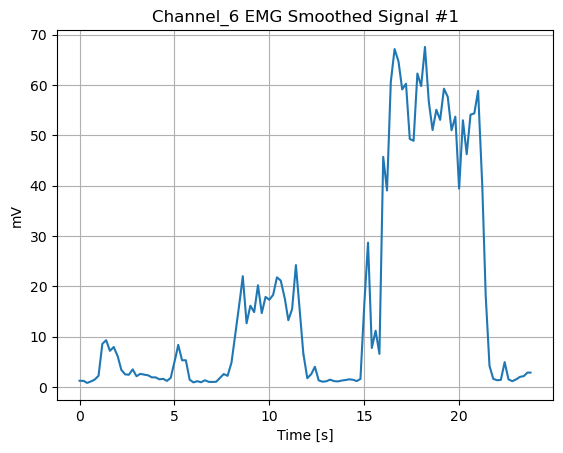

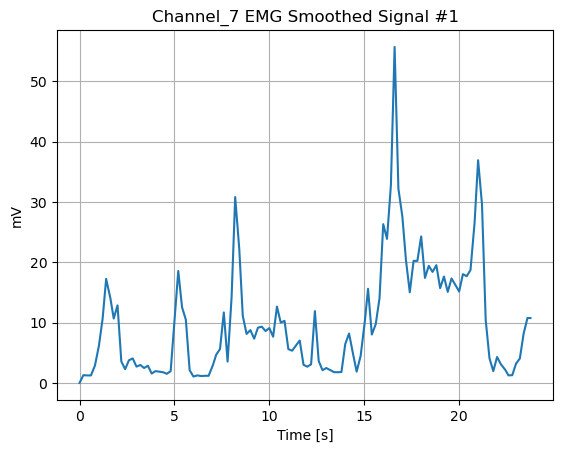

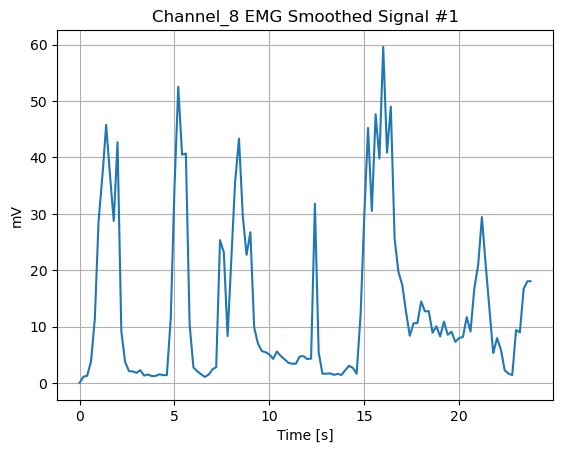

In [8]:
for i in range(1, 9):  # Canali da 1 a 8
    channel_name = f"Channel_{i}"
    muscle_emg_raw = dataframes[0][channel_name]
    emg_time = dataframes[0]['time']
    # Applica i filtri EMG
    muscle_emg_filtered, muscle_emg_rectified, muscle_emg_smoothed = emg_filters(muscle_emg_raw, emg_time)
    # Plotta il segnale EMG normalizzato (smoothed)
    plot_emg_signal(
        muscle_emg_smoothed[0],
        emg_time,
        title=f"{channel_name} EMG Smoothed Signal #1",
    )